In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston=load_boston()

In [3]:
data=boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
key=boston.keys()

In [5]:
key

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
features=pd.DataFrame(data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=["Target"])

In [7]:
data=pd.concat([features,target],axis=1)

In [8]:
correlation=data.corr("pearson")

In [9]:
abs(correlation['Target']).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Target     1.000000
Name: Target, dtype: float64

In [10]:
X=data["RM"]
Y=data["Target"]
Z=data["LSTAT"]

In [11]:
X=(X-X.min())/(X.max()-X.min())
Y=(Y-Y.min())/(Y.max()-Y.min())
Z=(Z-Z.min())/(Z.max()-Z.min())

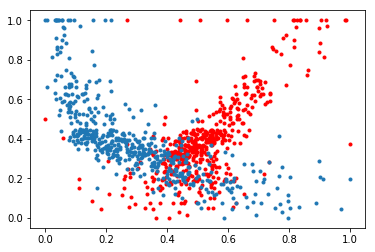

In [13]:
plt.plot(X,Y,'r.',
        Z,Y,'.')

In [14]:
x=np.array(X)
y=np.array(Y)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
len(x_train)

404

In [17]:
len(x_test)

102

In [18]:
def hypothesis(a,x,b,c,d):
    return a*np.power(x,3)+b*np.power(x,2)+c*x+d #ax3+bx2+cx+d

In [19]:
def error(a,x,b,c,d,y):
    e=0
    m=len(x)
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b,c,d)-y[i]),2)
        
    return (1/(2*m))*e

In [20]:
def step_gradient(a,x,b,c,d,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
    m=len(x)
    
    for i in range(m):
        grad_a +=(1/m)*(hypothesis(a,x[i],b,c,d)-y[i])*(np.power(x[i],3))
        grad_b +=(1/m)*(hypothesis(a,x[i],b,c,d)-y[i])*(np.power(x[i],2))
        grad_c +=(1/m)*(hypothesis(a,x[i],b,c,d)-y[i])*x[i]
        grad_d +=(1/m)*(hypothesis(a,x[i],b,c,d)-y[i])
        
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    d=d-grad_d*learning_rate
    
    return a,b,c,d

In [21]:
def descend(init_a,x,init_b,init_c,init_d,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
    d=init_d
    
    for i in range(iterations):
        e=error(a,x,b,c,d,y)
        
        if i%1000==0:
            print(f"Error:{np.sqrt(e)},a:{a},b:{b},c:{c},d:{d}")
    
        a,b,c,d=step_gradient(a,x,b,c,d,y,learning_rate)
        
    return a,b,c,d

In [30]:
a=0.3526014485874478
b=0.3776295656381087
c=0.30396952685688783
d=.06264214290505221
learning_rate=0.001
iterations=10000

In [31]:
final_a, final_b, final_c, final_d= descend(a,x_train,b,c,d,y_train,learning_rate,iterations)

Error:0.09193597783839266,a:0.3526014485874478,b:0.3776295656381087,c:0.30396952685688783,d:0.06264214290505221
Error:0.09193502989853997,a:0.3528620056516594,b:0.3779236818266675,c:0.30385053696972214,d:0.06256645044750274
Error:0.09193413148158978,a:0.35311375320757254,b:0.37820955344394597,c:0.30372672602502426,d:0.06249754680476313
Error:0.09193327812921245,a:0.3533570947707295,b:0.3784875665014737,c:0.3035983303834398,d:0.0624351100893257
Error:0.09193246579066515,a:0.3535924149682502,b:0.378758088929712,c:0.3034655753199178,d:0.06237883349650504
Error:0.09193169078551981,a:0.3538200804235681,b:0.3790214714249888,c:0.30332867554299475,d:0.06232842459793912
Error:0.09193094976979728,a:0.35404044059972267,b:0.37927804825676126,c:0.30318783568975416,d:0.0622836046681803
Error:0.09193023970519827,a:0.35425382860314825,b:0.3795281380370648,c:0.3030432507976007,d:0.06224410804283244
Error:0.09192955783114741,a:0.3544605619498152,b:0.37977204445391805,c:0.3028951067539408,d:0.06220968150

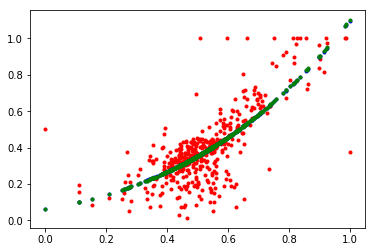

In [32]:
plt.plot(x_train,y_train,'r.',
        x_train, hypothesis(a,x_train,b,c,d),'b.',
        x_train, hypothesis(final_a,x_train,final_b,final_c,final_d),'g.')

In [33]:
y_test[:3]

array([0.29555556, 0.17333333, 0.32444444])

In [34]:
hypothesis(final_a,x_test[:3],final_b,final_c,final_d)

array([0.28902364, 0.26353767, 0.31689402])

In [35]:
np.sqrt(error(final_a,x_test,final_b,final_c,final_d,y_test))

0.12080363284274045

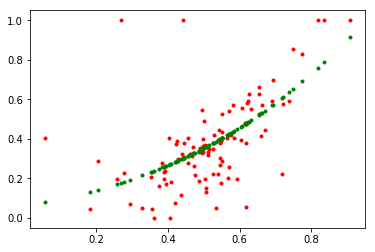

In [36]:
plt.plot(x_test, y_test, 'r.',
         x_test, hypothesis(final_a, x_test,final_b, final_c,final_d), 'g.')